In [1]:
from obspy.clients.fdsn.client import Client
from obspy import UTCDateTime as utc
import seaborn as sns
import SeisRoutine as sr

In [2]:
client = Client("ETH")
t1 = utc("2015-01-01T00:00:00")
t2 = utc("2015-01-11T00:00:00")
cat = client.get_events(starttime=t1,
                        endtime=t2,
                        includearrivals=True)

In [3]:
import importlib
importlib.reload(sr.inspector)

<module 'SeisRoutine.inspector' from '/home/iman/Documents/GitHub/SeisRoutine/SeisRoutine/inspector.py'>

In [4]:
insp = sr.inspector.catalog(cat=cat)
print(insp)

Number of Phases: 469
Number of Attributes: 38


In [24]:
insp.df_events['otime'][0].datetime

datetime.datetime(2015, 1, 10, 17, 37, 42, 85490)

(array([16436., 16437., 16438., 16439., 16440., 16441., 16442., 16443.,
        16444., 16445., 16446.]),
 [Text(16436.0, 0, '2015-01-01'),
  Text(16437.0, 0, '2015-01-02'),
  Text(16438.0, 0, '2015-01-03'),
  Text(16439.0, 0, '2015-01-04'),
  Text(16440.0, 0, '2015-01-05'),
  Text(16441.0, 0, '2015-01-06'),
  Text(16442.0, 0, '2015-01-07'),
  Text(16443.0, 0, '2015-01-08'),
  Text(16444.0, 0, '2015-01-09'),
  Text(16445.0, 0, '2015-01-10'),
  Text(16446.0, 0, '2015-01-11')])

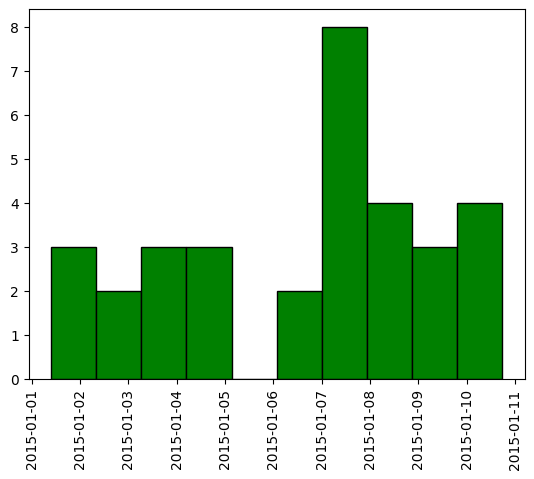

In [38]:
insp.plot_seismicity_events()


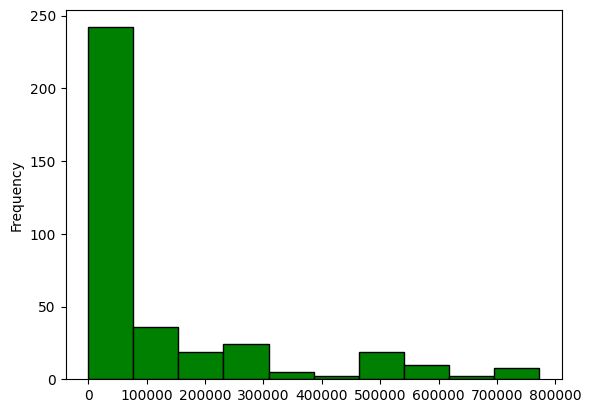

In [5]:
insp.plot_seismicity_phases()

In [6]:
import importlib
importlib.reload(sr.plot)

<module 'SeisRoutine.plot' from '/home/iman/Documents/GitHub/SeisRoutine/SeisRoutine/plot.py'>

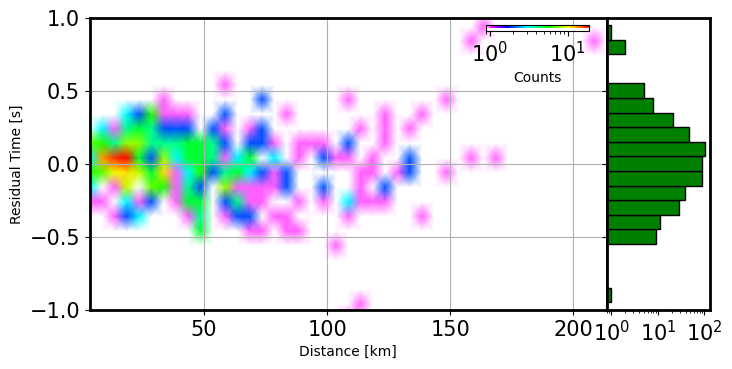

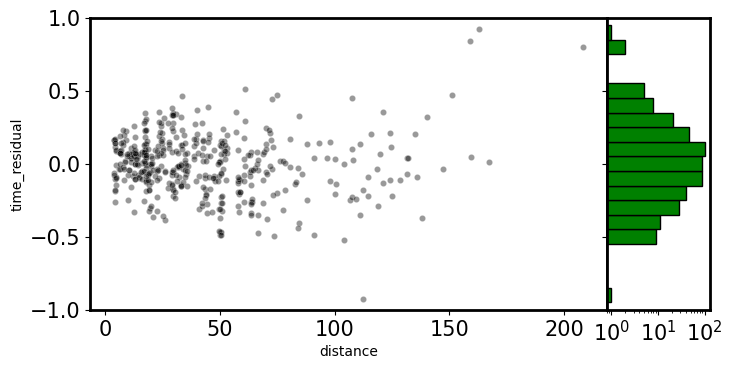

In [7]:
insp.plot_residual_vs_distance(kind='density',
                               ystep=0.1, xstep=5,
                               histlog=True, size=(8, 4), ylim=[-1, 1])
# import matplotlib.pyplot as plt
# plt.subplots_adjust(wspace=0, hspace=0)

insp.plot_residual_vs_distance(kind='normal', ystep=0.1, size=(8, 4), ylim=[-1, 1])

In [8]:
networks = insp.df_phases[['station', 'network']].drop_duplicates()
coords = {'station': [], 'latitude': [], 'longitude': []}
for index, net in networks.iterrows():
    try:
        inventory = client.get_stations(
            network=net.network, station=net.station,
            starttime=t1,
            endtime=t2)
        station = inventory[0][0]
        coords['station'].append(station.code)
        coords['latitude'].append(station.latitude)
        coords['longitude'].append(station.longitude)
    except Exception as error:
        # print(error)
        pass

In [9]:
import pandas as pd
coords = pd.DataFrame(coords)

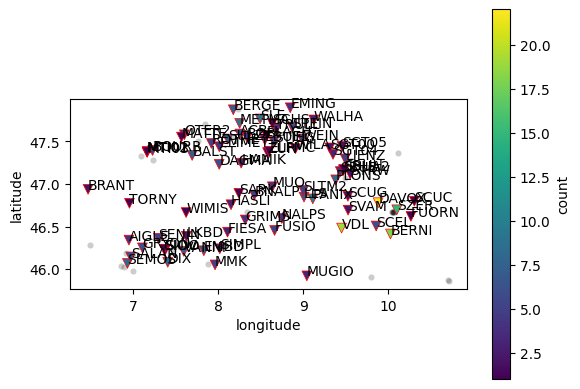

In [10]:
insp.plot_station_participation(coords)

Number of calculated s-p: 168
Number of all phases: 469
Number of P-type phases: 284
Number of S-type phases: 185


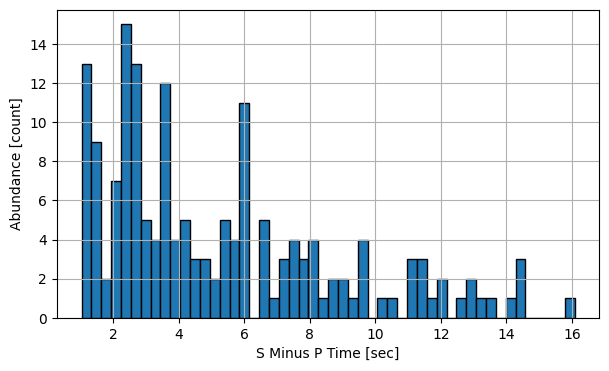

In [11]:
insp.plot_hist_SminusP(bins=50)

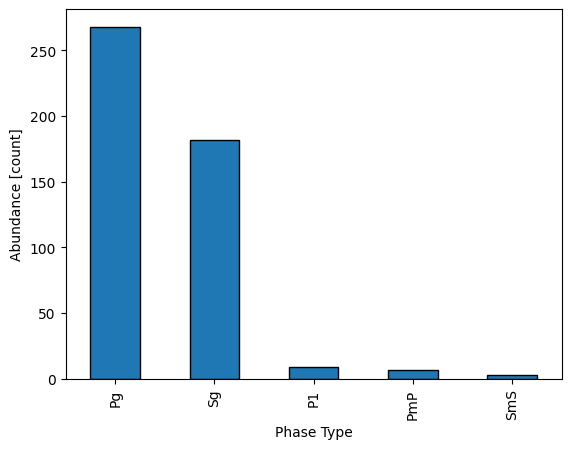

In [12]:
insp.plot_bar_phasetype()

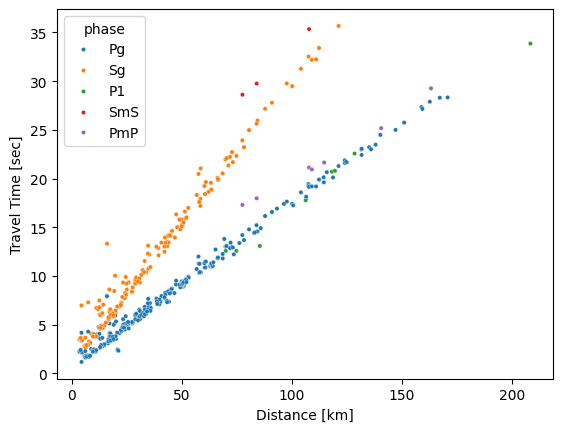

In [13]:
insp.plot_traveltime()

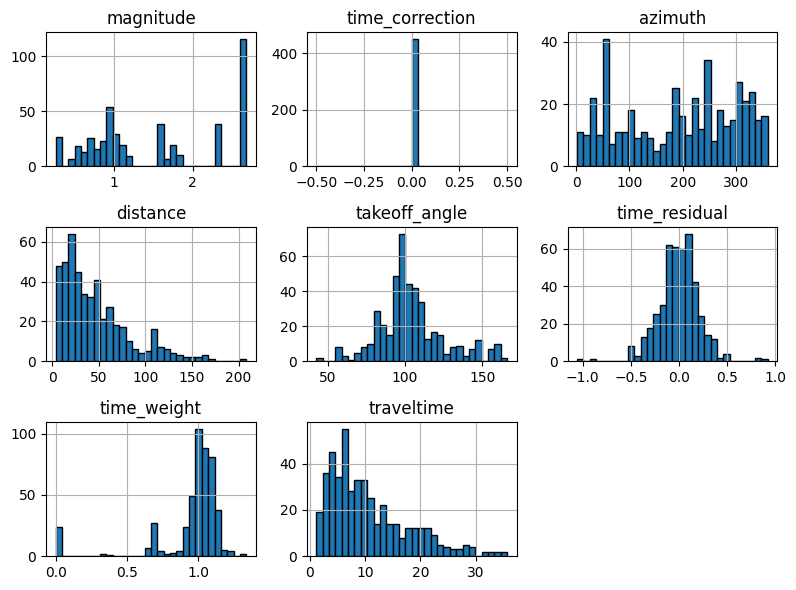

In [14]:
insp.plot_hist_of_numeric(figsize=(8, 6), bins=30, edgecolor='k')

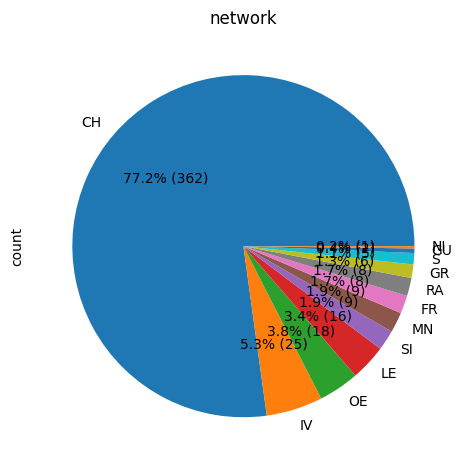

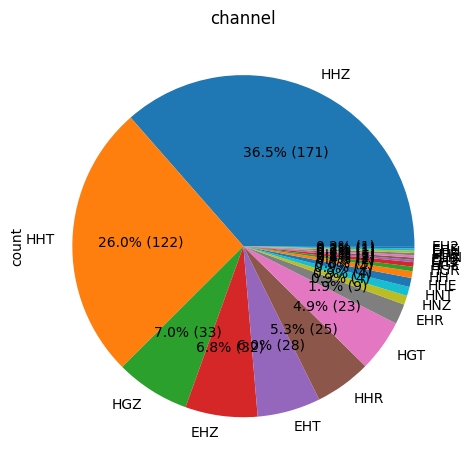

In [15]:
insp.plot_pie_of_none_numeric()

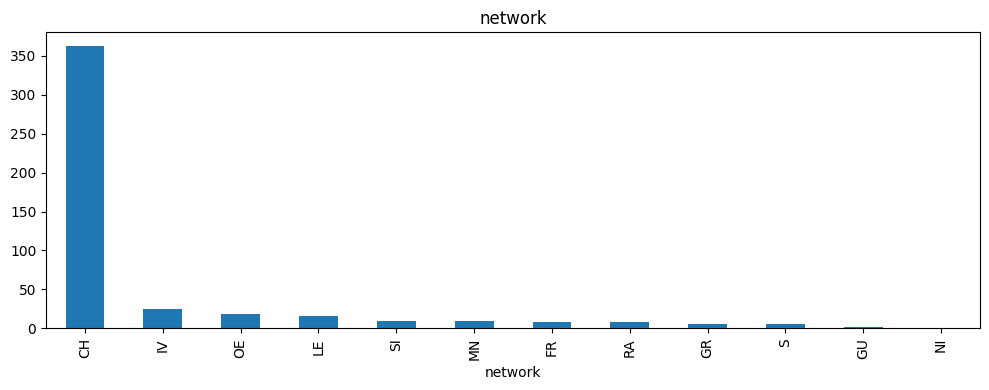

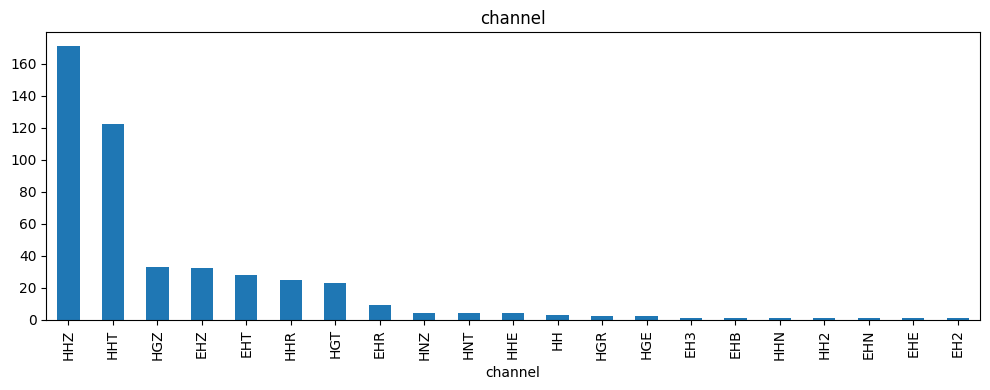

In [16]:
insp.plot_bar_of_none_numeric(figsize=(10, 4))

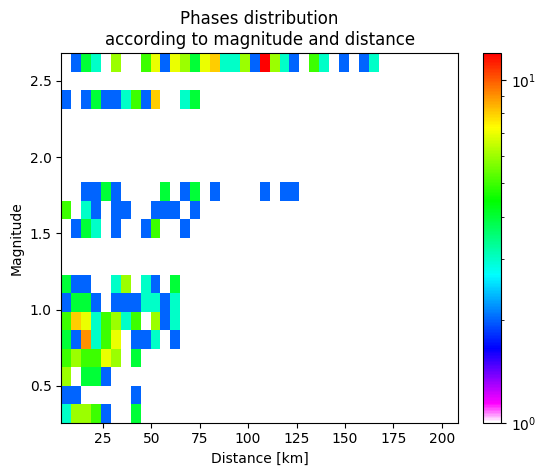

In [17]:
insp.plot_phase_mag_dist()